# CNN (Convolutional Neural Network):- 
- Image classification/ identification

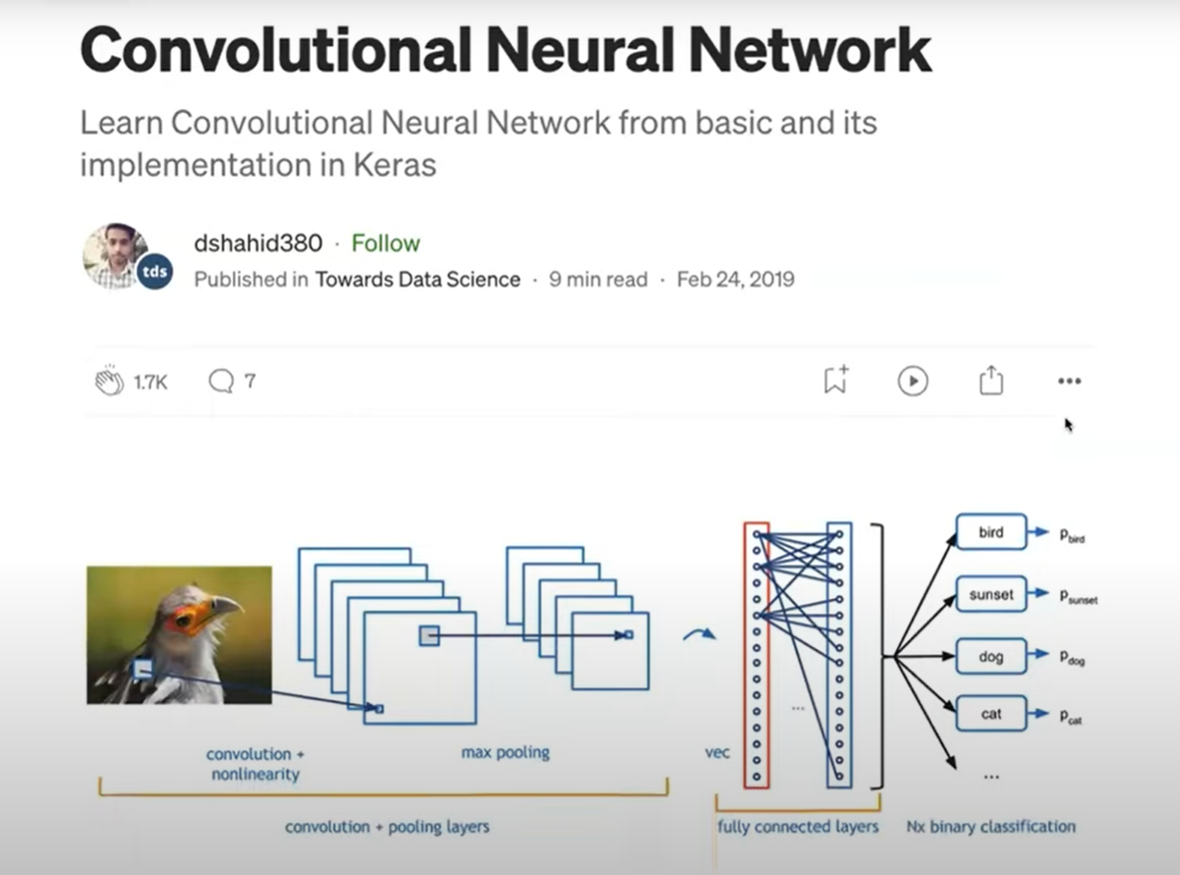

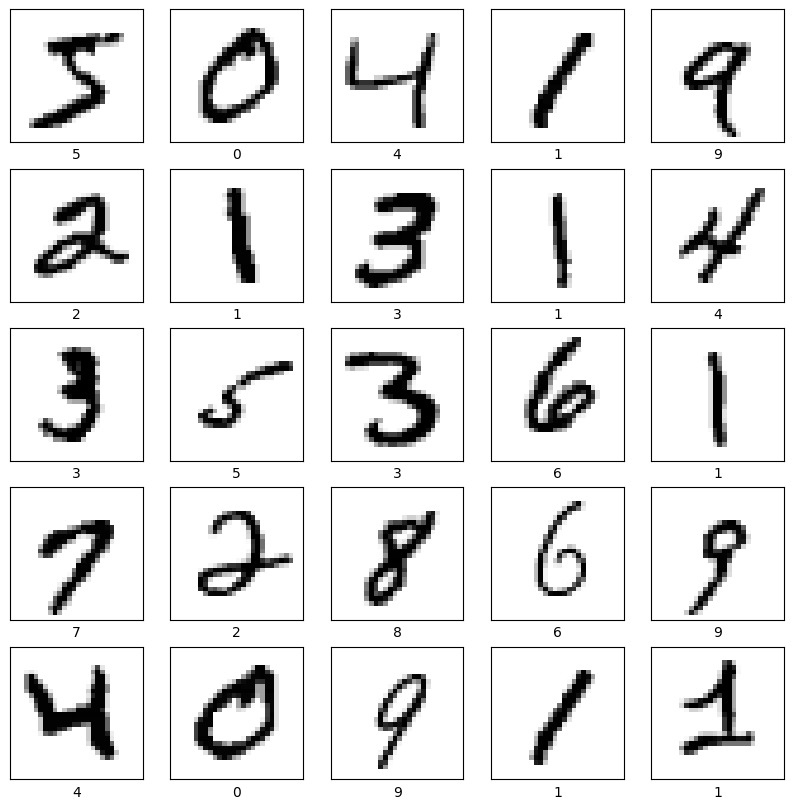

In [44]:
# importing libraries
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt

# loading the dataset
(X_train, y_train), (X_test, y_test) = keras.datasets.mnist.load_data()

# Displaying some images
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(X_train[i], cmap=plt.cm.binary)
    plt.xlabel(y_train[i])
plt.show()

In [45]:
# explore the data
print(f"We have {len(X_train)} images in training set and {len(X_test)} images in testing set")
print(f"Size of each image is {X_train[0].shape}")

We have 60000 images in training set and 10000 images in testing set
Size of each image is (28, 28)


In [46]:
X_train.shape, y_train.shape , X_test.shape, y_test.shape

((60000, 28, 28), (60000,), (10000, 28, 28), (10000,))

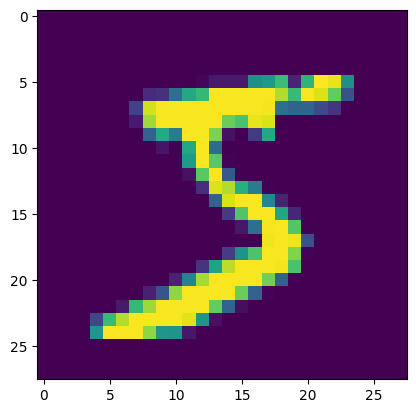

In [47]:
import matplotlib.pyplot as plt
plt.imshow(X_train[0])



Text(0.5, 1.0, '5')

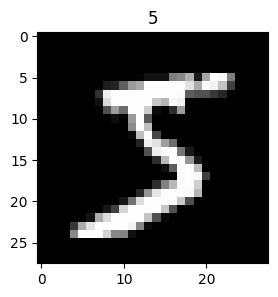

In [48]:
plt.figure(figsize=(3,3))
plt.imshow(X_train[0], cmap='gray')
plt.title(y_train[0])

Text(0.5, 1.0, '5')

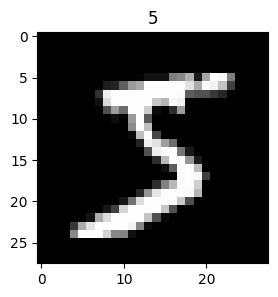

In [49]:
index_image = 0
image = X_train[index_image]

plt.figure(figsize=(3,3))
plt.imshow(image, cmap='gray')
plt.title(y_train[index_image])


(-0.5, 27.5, 27.5, -0.5)

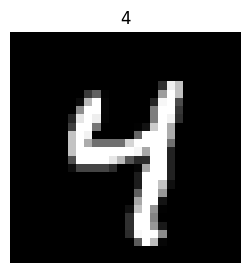

In [50]:
# Random image each time
import random as r
index_image = r.randint(0, len(X_train))
image = X_train[index_image]

plt.figure(figsize=(3,3))
plt.imshow(image, cmap='gray')
plt.title(y_train[index_image])
plt.axis('off')


Pixels matrix of the image
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   3  18  18  18 126 136 175  26 166 255 247 127   0   0   0   0
   0   0   0   0   0   0   0   0  30  36  94 154 170 253 253 253 253 253 225 172 253 242 195  64   0   0   0   0
   0   0   0   0   0   0   0  49 238 253 253 253 253 253 253 253 253 251  93  82  82  56  39   0   0   0   0   0
   0   0   0   0   0   0   0  18 219 253 253 253 253 253 198 182 247 

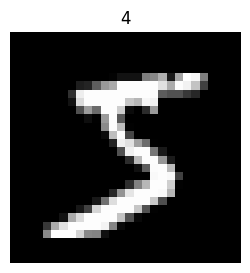

In [51]:
plt.figure(figsize=(3,3))
plt.imshow(X_train[0], cmap='gray')
plt.title(y_train[index_image])
plt.axis('off')

# Displaying the image in pixels matrix
print("Pixels matrix of the image")
for row in X_train[0]:
    for pixels in row:
        print("{:4}".format(pixels), end="")
    print()

In [52]:
# load the dataset
(X_train, y_train), (X_test, y_test) = keras.datasets.mnist.load_data()

# reshape the data as we do not have 3rd of an image
X_train = X_train.reshape(X_train.shape+(1,))
X_test = X_test.reshape(X_test.shape+(1,))

X_train.shape, X_test.shape

((60000, 28, 28, 1), (10000, 28, 28, 1))

## Normalize the data
Neural networks tend to like normalized data and perform better on it. Normalization, in simple terms, means to have the data at the same scale, that is, in our case, between 0 and 1. Let's normalize our train and test images.

In [53]:
# Normalize the data
X_train = X_train/255
X_test = X_test/255

X_train.shape, X_test.shape

((60000, 28, 28, 1), (10000, 28, 28, 1))

In [54]:
# also need to change the data type to float32
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')

# Build the model

In [55]:
import tensorflow as tf
from tensorflow.keras import layers

# create an input layer
input_layer = layers.Input(shape=(28,28,1)) # 28x28 pixels image with 1 color channel i.e. grayscale

# Build the CNN model
model = tf.keras.Sequential([
    input_layer, # input layer
    layers.Conv2D(filters=10, kernel_size=(3,3), activation='relu'), # Convolutional layer
    # filter is the number of filters we want to apply
    # kernel is the size of window/ filter moving over the image
    layers.Conv2D(filters=10, kernel_size=(3,3),activation='relu'), # Convolutional layer
    layers.MaxPooling2D(), # Pooling layer
    layers.Conv2D(filters=10, kernel_size =(3,3),activation='relu'), # Convolutional layer
    layers.Conv2D(filters=10, kernel_size=(3,3),activation='relu'), # Convolutional layer
    layers.MaxPooling2D(), # Pooling layer
    layers.Flatten(), # Flatten layer
    layers.Dense(10, activation = 'softmax') # Output layer
])
    

In [56]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_8 (Conv2D)           (None, 26, 26, 10)        100       
                                                                 
 conv2d_9 (Conv2D)           (None, 24, 24, 10)        910       
                                                                 
 max_pooling2d_4 (MaxPoolin  (None, 12, 12, 10)        0         
 g2D)                                                            
                                                                 
 conv2d_10 (Conv2D)          (None, 10, 10, 10)        910       
                                                                 
 conv2d_11 (Conv2D)          (None, 8, 8, 10)          910       
                                                                 
 max_pooling2d_5 (MaxPoolin  (None, 4, 4, 10)          0         
 g2D)                                                 

In [57]:
# compile the model
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(),
            #   loss='sparse_categorical_crossentropy',
              metrics=['accuracy']
              )

In [58]:
# train the model
model.fit(X_train, y_train, epochs=5,batch_size=32,validation_split=0.2)

Epoch 1/5
1500/1500 [==============================] - 57s 35ms/step - loss: 0.3043 - accuracy: 0.9051 - val_loss: 0.1282 - val_accuracy: 0.9618
Epoch 2/5
1500/1500 [==============================] - 52s 34ms/step - loss: 0.1045 - accuracy: 0.9682 - val_loss: 0.0772 - val_accuracy: 0.9769
Epoch 3/5
1500/1500 [==============================] - 52s 35ms/step - loss: 0.0776 - accuracy: 0.9762 - val_loss: 0.0704 - val_accuracy: 0.9795
Epoch 4/5
1500/1500 [==============================] - 52s 35ms/step - loss: 0.0647 - accuracy: 0.9805 - val_loss: 0.0653 - val_accuracy: 0.9818
Epoch 5/5
1500/1500 [==============================] - 50s 34ms/step - loss: 0.0548 - accuracy: 0.9826 - val_loss: 0.0572 - val_accuracy: 0.9840


In [59]:
# evaluate the model
test_loss, test_acc = model.evaluate(X_test, y_test)
print("Test accuracy", test_acc)
print("Test loss", test_loss)

313/313 [==============================] - 5s 14ms/step - loss: 0.0436 - accuracy: 0.9868
Test accuracy 0.9868000149726868
Test loss 0.04360192269086838


In [60]:
# save the model
model.save('models_saved/digit_recognizer.h5')

c:\Users\Sumit Sharma\.conda\envs\tf_env\lib\site-packages\keras\src\engine\training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [61]:
# Predict on new images
from tensorflow.keras.preprocessing import image
import numpy as np

img = image.load_img('28x28.png', target_size=(28, 28), color_mode='grayscale')
img_array = image.img_to_array(img) / 255.0
img_array = img_array.reshape(1, 28, 28, 1)

prediction = model.predict(img_array)
predicted_class = np.argmax(prediction, axis=1)

if predicted_class == 1:  # Assuming class 1 is "Explicit Image"
    print("Explicit Image")
else:
    print("Non-Explicit Image")


1/1 [==============================] - 0s 261ms/step
Non-Explicit Image


In [64]:
# Import necessary libraries
from tensorflow.keras.preprocessing import image
import numpy as np

# Load and preprocess the image
img_path = '28x28.png'  # Replace with the path to your image
img = image.load_img(img_path, target_size=(28, 28), color_mode='grayscale')
img_array = image.img_to_array(img) / 255.0
img_array = img_array.reshape(1, 28, 28, 1)

# Predict the class using the trained model
prediction = model.predict(img_array)

# Determine the class and print the result
predicted_class = np.argmax(prediction, axis=1)[0]  # Get the index of the highest probability

# Define labels based on your training dataset
class_labels = {0: "0", 1: "1", 2: "2", 3: "3", 4: "4", 5: "5", 6: "6", 7: "7", 8: "8", 9: "9"}  # Adjust according to your dataset

# Output the prediction
if predicted_class in class_labels:
    print(f"Predicted Class: {class_labels[predicted_class]}")
    print(f"Confidence Score: {np.max(prediction):.2f}")
else:
    print("Prediction Error: Class not recognized.")


1/1 [==============================] - 0s 56ms/step
Predicted Class: 3
Confidence Score: 1.00


In [66]:
for i in range(265,271):
    print(i)

265
266
267
268
269
270
